Section-2 | Team 9 | <b>Team Members</b>: Japsowin Kaur, Shalini Mishra, Shivani Sharma

In [43]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [111]:
fifa = pd.read_csv("FIFA19data.csv", sep=r'\s*,\s*', engine='python')
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Dropping the personal information of players like ID, name and their nationality
<br>Assuming Overall score is more of a reflection of playing capabilities of the player
<br>Dropping columns like Body type, club, net value and Wage
<br>A player's wage and value is most likely to be a product of their club and overall score

In [3]:
#checking for duplicates in the data
fifa[fifa.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes


In [112]:
fifa = fifa.drop('ID', 1)
fifa = fifa.drop('Name', 1)
fifa = fifa.drop('Nationality', 1)
fifa = fifa.drop('Club', 1)
fifa = fifa.drop('Value', 1)
fifa = fifa.drop('Wage', 1)
fifa = fifa.drop('Body Type', 1)
fifa = fifa.drop('Potential', 1)

<h3> Correlation Plot for all the features available in our dataset

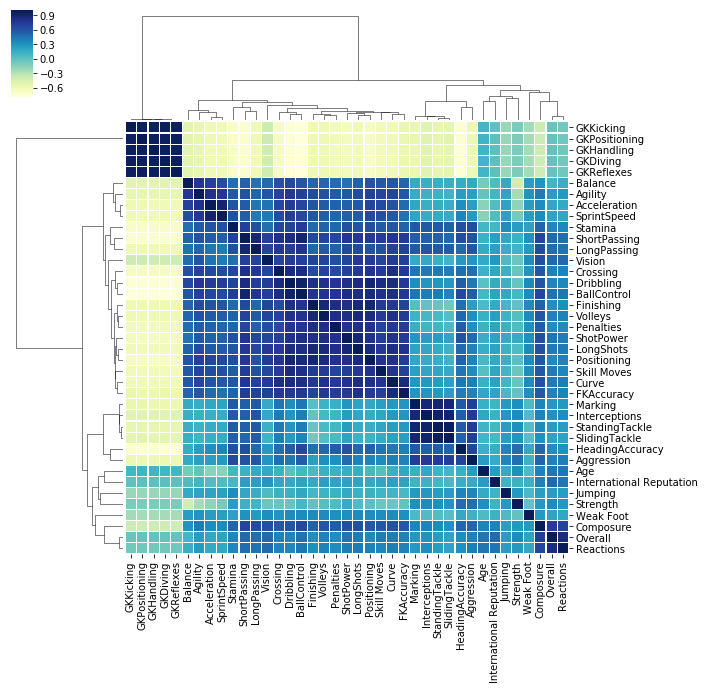

In [6]:
#Creating a grid Correlation Matrix
arr_corr=fifa.corr()
cg = sns.clustermap(arr_corr, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

GKKicking,GKPositioning,GKHandling,GKDiving all of them are highly correlated to each other. We can start testing our models by excluding one of them and check the variation in overall p-values for these columns

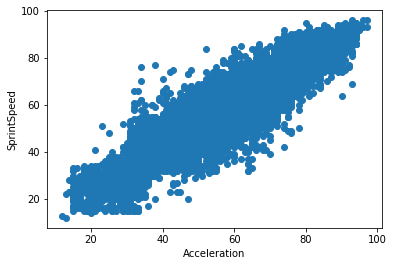

In [7]:
#Based on the correlation plot above, we can see that
#acceleration and SprintSpeed are highly correlated
x=fifa['Acceleration']
y=fifa['SprintSpeed']
#Plot to view the relationship between the two
plt.scatter(x, y)
plt.xlabel('Acceleration')
plt.ylabel('SprintSpeed')
plt.show()



SlidingTackle and StandingTackle have identical distribution. So does markings and interceptions have similar distribution in data. Meaning that these pairs show similar scores for a player.All of these attributes intuitively falls under broad category of player's ability in tackling the ball, the effects of which can be seen below. We can anyone of these variables in our model.

C:\Users\shali\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shali\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


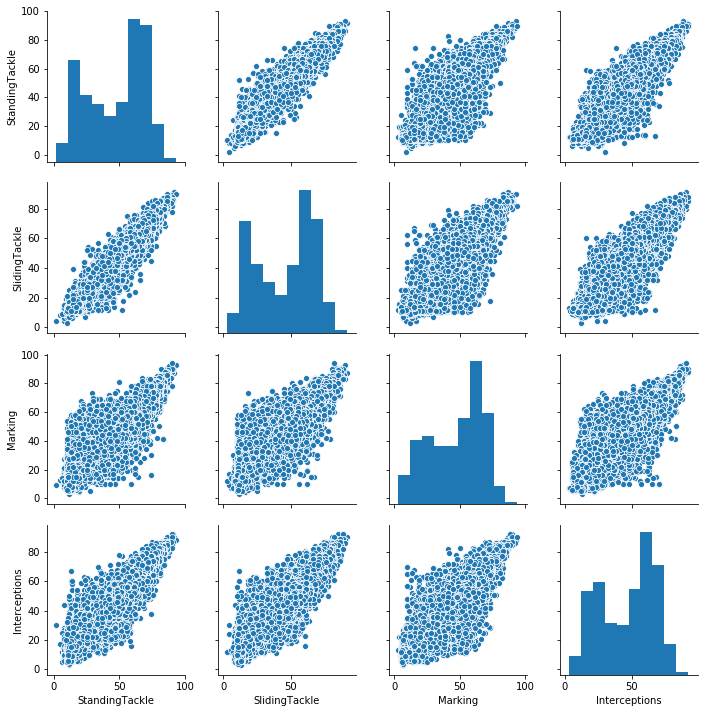

In [8]:
df_scatter=fifa[['StandingTackle','SlidingTackle','Marking','Interceptions']]
sns.pairplot(df_scatter, kind="scatter", palette="Set2")
plt.show()

We observed Long Passing, Short Passing, Long Shots,finishing and ball control to be <b>highly positively correlated</b> with each other. As all of them have to do with positioning, for e.g. a good score in long passing of a player also is indicative of the fact that they are good at long shots which inturn explains high score in ball control and so on
<br>Also, the ditribution of longshots, longpassings and ShotPower are almost identical. Similarly,in the case of BallControl and ShortPassing

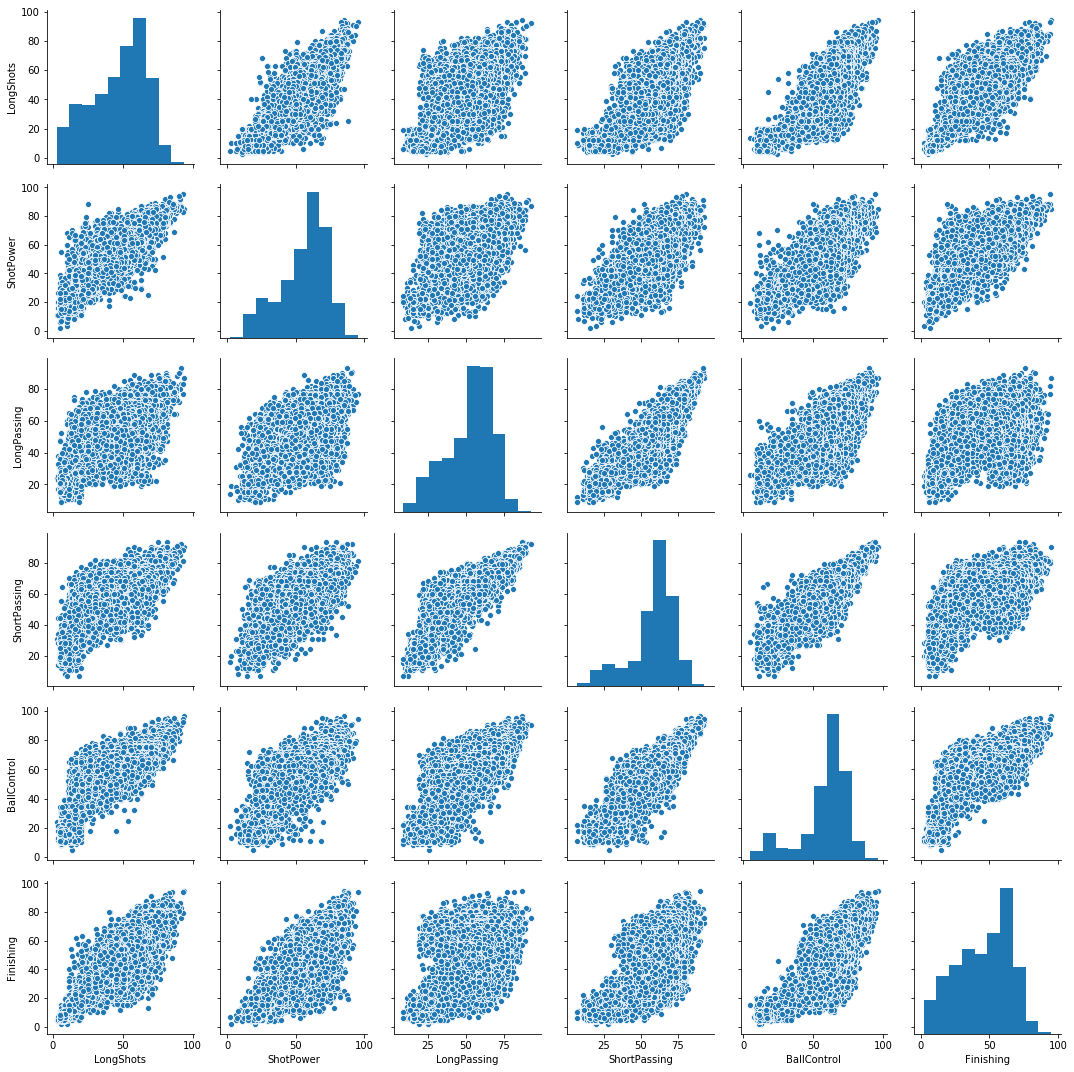

In [9]:
from pandas.plotting import scatter_matrix
df_scatter=fifa[['LongShots','ShotPower','LongPassing','ShortPassing','BallControl','Finishing']]
sns.pairplot(df_scatter, kind="scatter")
plt.show()

There is s strong correlation between Positioning and BallControl Scores as can be seen in the correlogram below. We can take Positioning in place of all the correlated variables like 'BallControl','LongPassing' etc.

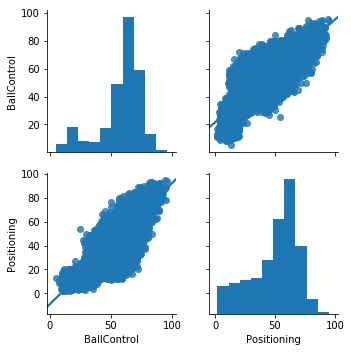

In [10]:
import seaborn as sns 
df=fifa[['BallControl','Positioning']]
sns.pairplot(df, kind="reg")
plt.show()

Volleys and Dribbling are positively correlated to each other (in a very linear way) as can be seen in the plot.
Scores for positioning and dribbling have very similar score distribution in our dataset indicating that a player is most likely to get scored similarly in both of these categories
Same can be said in the case of crossing, Dribbling and Crossing are highly positively correlated and can be seen in the diagram below too

C:\Users\shali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


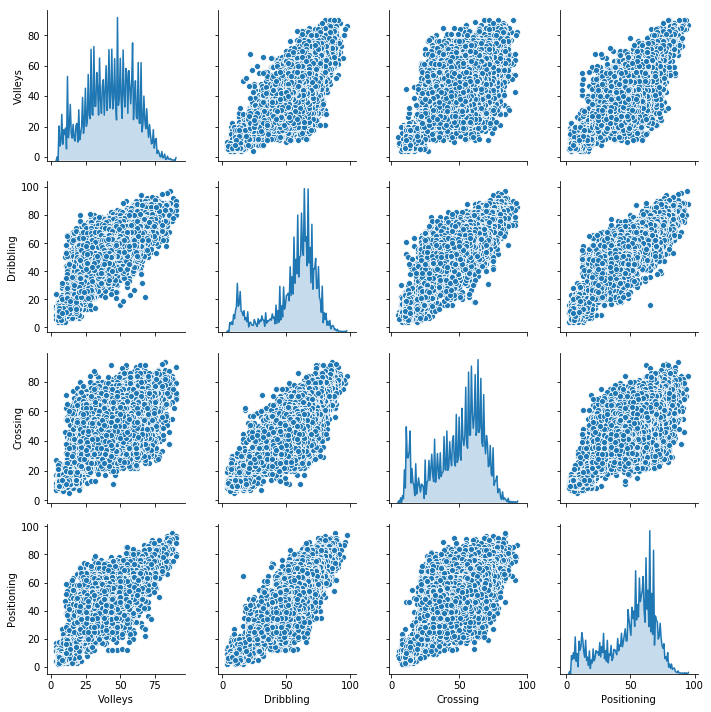

In [11]:
df=fifa[['Volleys','Dribbling','Crossing','Positioning']]
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )

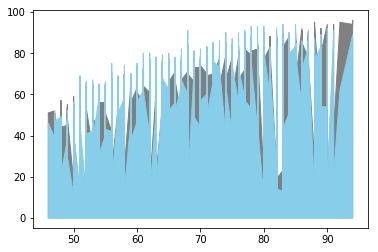

In [12]:
#HeadingFrequency and BallControl scoring 
plt.fill_between( fifa['Overall'], fifa['BallControl'], color="grey")
plt.fill_between( fifa['Overall'], fifa['HeadingAccuracy'], color="skyblue")
plt.show()


## Data Preprocessing

In [113]:
#Replacing missing values with most frequent occurrence
index=fifa.index
fifa_imp=fifa.copy()
from sklearn.impute import SimpleImputer as Imputer
#Creating an object for SimpleImputer
imp_freq=Imputer(missing_values=np.nan,strategy='most_frequent')
fifa_imp=pd.DataFrame(imp_freq.fit_transform(fifa_imp))
fifa_imp.columns = fifa.columns
fifa_imp.index = index

#Check if imputation worked
fifa_imp.isna().sum()

Age                         0
Overall                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Contract Valid Until        0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure 

In [114]:
#We have details for months of few years but snot for all
#For consistency, retaining just year till which contract is valid
fifa_imp['Contract Valid Until']= fifa_imp['Contract Valid Until'].apply(lambda x: str(x)[-2:])
fifa_imp['Contract Valid Until'].unique()

array(['21', '22', '20', '23', '19', '24', '25', '26', '18'], dtype=object)

In [115]:
#Few records are for 2025 and 2016-merging them into one group
fifa_imp.loc[fifa_imp['Contract Valid Until']=='25', 'Contract Valid Until'] = '25+'
fifa_imp.loc[fifa_imp['Contract Valid Until']=='26', 'Contract Valid Until'] = '25+'
fifa_imp['Contract Valid Until'].unique()

array(['21', '22', '20', '23', '19', '24', '25+', '18'], dtype=object)

In [116]:
factors = ['International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Contract Valid Until']

for var in factors:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(fifa_imp[var], prefix=var)
    fifa_imp = pd.concat([fifa_imp,cat_list], axis = 1)
    fifa_imp = fifa_imp.drop(var, 1) #dropping the column for which dummy variables are getting created

In [146]:
X = fifa_imp.copy()
X = X.drop('Overall', 1)
Y = fifa_imp.copy()
Y = Y['Overall']


In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)

# Basic Linear Model
<h4>Full Model: Using the same set of features as shared in the homework module</h4>

In [148]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
lm1_predictions = lm1.predict(X_test)
lm1_r2 = r2_score(y_test,lm1_predictions)
print(lm1_r2)

0.8901853111986295


<h4>Statsmodel OLS to go through model summary, R-squared isn't enough to evaluate a model 
For model interpretation, We need to look into individual p-values to make sure there isn't high multicollinearity and we aren't using variables not required in the model</h4>

In [120]:
import statsmodels.api as sm
#removing one dummy variable from each set
X_train = X_train.drop(['Skill Moves_1.0','Weak Foot_1.0','Contract Valid Until_25+',
            'Work Rate_Low/ Low','Position_GK','International Reputation_1.0'],1)
#adding a constant for intercept
X_train = sm.add_constant(X_train)
model2=sm.OLS(y_train.astype(float),X_train.astype(float))
results=model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     189.5
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:24:17   Log-Likelihood:                -4001.6
No. Observations:                1820   AIC:                             8175.
Df Residuals:                    1734   BIC:                             8649.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\shali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<h4>Note:</h4>We can't use this model as it can be seen in the model summary that many of these variables are insignificant. Also, in our EDA we have observed overlap between a set of scores. Including all of them in the model will not resolve the issue of multicollinearity 

# New Set of X
## Set 1
Removing one dummary variable from each set<br>
As can be seen in the Correlation analysis above, <br>Only one variable out of LongShots,LongPassing,ShortPassing,ShotPower,BallControl,Positioning is enough to explain the variation as all od them are highly correlated with each other. <br> Similarly, Crossing, Dribbling and Positioning are highly correlated to each other. The behavior between volleys and crossing is very similar in nature
<br>Removing one of the GK abilities and checking the model summary
<br>One of StandingTackle, SlidingTackle,Markings and Interceptions can be used in the model
<br>Similarly, SprintSpeed and Acceleration are identical in scoring across players, one of the two is enough to explain the variation in overall score


In [121]:
X = fifa_imp.copy()
X = X.drop(['Overall',
            'LongShots','Finishing','LongPassing','ShortPassing','GKDiving',
            'StandingTackle','SlidingTackle','SprintSpeed','Interceptions',
            'Volleys','Dribbling','Crossing','ShotPower'], 1)
Y = fifa_imp.copy()
Y = Y['Overall']

In [122]:
#Splitting the dataset into validation and training set
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)

In [123]:
#Running linear regression
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
lm1_predictions = lm1.predict(X_test)
lm1_r2 = r2_score(y_test,lm1_predictions)
print(lm1_r2)

0.8841529317388879


In [124]:
#Running statsmodels ols to get model summary
import statsmodels.api as sm
X_train = X_train.drop(['Skill Moves_1.0','Weak Foot_1.0','Contract Valid Until_25+',
            'Work Rate_Low/ Low','Position_GK','International Reputation_1.0'], 1)
#adding constant for intercept
X_train_ols=sm.add_constant(X_train)
model1=sm.OLS(y_train.astype(float),X_train_ols.astype(float))
results=model1.fit()
#Print Model summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     203.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:24:59   Log-Likelihood:                -4083.3
No. Observations:                1820   AIC:                             8313.
Df Residuals:                    1747   BIC:                             8715.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\shali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Set 2: New X
<h4>Removing all the Work Rates and Position variables because of very high p-values(insignificant)</h4>


In [125]:
X=X.iloc[:,0:35]
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
lm2_predictions = lm2.predict(X_test)
lm2_r2 = r2_score(y_test,lm2_predictions)
print(lm2_r2)

0.862153648034189


In [126]:
import statsmodels.api as sm
X_train = X_train.drop(['Skill Moves_1.0','Weak Foot_1.0','International Reputation_1.0'], 1)
X_train_ols = sm.add_constant(X_train)
model2=sm.OLS(y_train.astype(float),X_train_ols.astype(float))
results=model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     384.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:25:19   Log-Likelihood:                -4269.8
No. Observations:                1820   AIC:                             8604.
Df Residuals:                    1788   BIC:                             8780.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\shali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Set 3<br>
Removing all the variables with high p-value<br>All weak foot variables due to high p-values(insignificant)
<br>BallControl and HeadingAccuracy were found to be very similar in the EDA.
As, we have positioning in our model and p-value for Heading Accuracy insignificant. We remove it<br>Removing international reputation=5 due to very high p-value<br>Jumping,Penalties are insignificant too<br>Personal traits like Aggression, Agility, Stamina, Accuracy is somewhat captured in the playscores of the players. For e.g. players with higher stamina and accuracy are more likely to have high long shot score.<br>It might be due to this relationship with underlying scores, they are insignificant in explaining overall scores

In [127]:
X=X.drop(['Weak Foot_2.0','Weak Foot_3.0','Weak Foot_4.0','Weak Foot_5.0',
       'Jumping','Penalties','Aggression','HeadingAccuracy','Curve','FKAccuracy',
       'International Reputation_5.0','Stamina','Agility','Vision'],1)
X_trainf,X_testf,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)
lm3 = LinearRegression()
lm3.fit(X_trainf, y_train)
lm3_predictions = lm3.predict(X_testf)
lm3_r2 = r2_score(y_test,lm3_predictions)
print(lm3_r2)

0.8494995158218602


In [128]:
import statsmodels.api as sm
X_train_ols=X_trainf.drop(['Skill Moves_1.0','Weak Foot_1.0'],1)
X_train_ols = sm.add_constant(X_train_ols)
model3=sm.OLS(y_train.astype(float),X_train_ols.astype(float))
results=model3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     604.5
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:25:47   Log-Likelihood:                -4346.6
No. Observations:                1820   AIC:                             8731.
Df Residuals:                    1801   BIC:                             8836.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\shali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Cross-Validation
<h4>Q2. Using the same training and test sets, fit a simple regression model but with 5-fold cross validation and predict the overall scores of players in the test set. <br>Calculate R^2 for the predictions and compare with the R^2 from question 1. <br>Please explain your observation.</h4>

In [129]:
#Using 5fold CV
cv_predictions = cross_val_predict(lm3, X_testf, y_test, cv=5)
#R-squared for CV
cv_r2 = r2_score(y_test,cv_predictions)
print('CV 5:',cv_r2)
print('Linear Model:',lm3_r2)

CV 5: 0.8503370726624772
Linear Model: 0.8494995158218602


<h4>Q3.Using the training data from question 1, fit a Lasso regression to predict the overall scores of players in the test set.<br> Use the default value of alpha (alpha is used to tune the penalty. Higher the value of alpha, fewer the number of features) parameter, which is usually 1. <br>How many features are being used by the model? Calculate the R^2 for the predictions you made on the test set and compare with the R^2 from question 1. Please explain your observation.</h4>


In [151]:
#Re-Creating the original dataset
X = fifa_imp.copy()
X = X.drop('Overall', 1)
Y = fifa_imp.copy()
Y = Y['Overall']

In [152]:
#Splitting the dataset into validation and training set
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)

In [153]:
#default value of alpha(tuning parameter)=1
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso1_predictions = lasso.predict(X_test)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
#Counting the features whose beta!=0
coeff_used = np.sum(lasso.coef_!=0)

In [154]:
print("R-squared training score:", train_score)
print("R-squared test score: ", test_score)
print("number of features used: ", coeff_used)

R-squared training score: 0.8584100702105251
R-squared test score:  0.8508221432029555
number of features used:  23


In [155]:
#Checking adjusted R2
lm_train_score=lm1.score(X_train,y_train)
lm_test_score=lm1.score(X_test,y_test)

#Adjusted R-squared for lm(full model)
lm_ra = 1-(1-lm_train_score)*((len(X_train)-1)/(len(X_train)-len(lm1.coef_)-1))
print('Adjusted R-squared for LM')
print(lm_ra)
print(lm_train_score)
#adjusted R-squared for Lasso
lasso_ra = 1-(1-train_score)*((len(X_train)-1)/(len(X_train)-coeff_used-1))
print('Adjusted R-squared for Lasso')
print(lasso_ra)
print(train_score)

Adjusted R-squared for LM
0.8975106366271882
0.9028069533710279
Adjusted R-squared for Lasso
0.8565968361430651
0.8584100702105251


<h4>Q4: Do you expect your answer to question 3 to change if you are using ridge- or log- instead of lasso-penalties? Please explain.</h4>

In [157]:
from sklearn.linear_model import Ridge
rm = Ridge()
X_train_ridge = X_train.drop(['Skill Moves_1.0','Weak Foot_1.0','Contract Valid Until_25+',
            'Work Rate_Low/ Low','Position_GK','International Reputation_1.0'],1)
rm.fit(X_train_ridge, y_train)
train_score=rm.score(X_train_ridge,y_train)
X_test_ridge=X_test.drop(['Skill Moves_1.0','Weak Foot_1.0','Contract Valid Until_25+',
            'Work Rate_Low/ Low','Position_GK','International Reputation_1.0'],1)
test_score=rm.score(X_test_ridge,y_test)

#Adjusted R-squared for Ridge(Validation Set)
ridge_ra = 1-(1-train_score)*((len(X_train_ridge)-1)/(len(X_train_ridge)-coeff_used-1))
print(ridge_ra)
print('no. of coefficients used in Ridge:',np.sum(rm.coef_!=0))
#in Ridge, a coefficient if insignificant never has a beta value of 0 for that the tuning parameter 
#has to be infinite which is impossible. So in ridge, we don't get a subset of variables, rather insignificant 
#variables have betas~0
print('no. of coefficients used in Lasso:',np.sum(lasso.coef_!=0))

0.9012355408810173
no. of coefficients used in Ridge: 86
no. of coefficients used in Lasso: 23


# Lasso
<h4>Q5-Now try to fit a Lasso regression to predict the overall scores of players with an ideal value for alpha.<br>Your code should try to test different values of alpha and use the ideal one. What, according to your code, is the ideal value of alpha? How many features are being used by the model? <br>Calculate the R^2 for the predictions you made on the test set and compare with the R^2 from question 1. Please explain your observation.</h4>

The code should trying to test different values of alpha and use the ideal one. 

In [158]:
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]} #tuning parameters

lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)

lasso_regressor.fit(X_train, y_train)

C:\Users\shali\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shali\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shali\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shali\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [159]:
#the alpha value at which best estimation was made
lasso_regressor.best_params_

{'alpha': 0.001}

In [160]:
print('Train(Lasso):',lasso_regressor.best_estimator_.score(X_train,y_train))
print('Test(Lasso):',lasso_regressor.best_estimator_.score(X_test,y_test))

Train(Lasso): 0.9026059121701006
Test(Lasso): 0.8906383869959443


In [105]:
#Reduced Model
print('Train(Linear):',lm3.score(X_trainf,y_train))
print('Test(Linear):',lm3.score(X_testf,y_test))

Train(Linear): 0.8612473210776034
Test(Linear): 0.8490193156647038


In [161]:
#Number of coefficients used for the best estimation where beta coef!=0
coeff_used = np.sum(lasso_regressor.best_estimator_.coef_!=0)
print(coeff_used)

80


In [162]:
#predict for the validation test using lasso with CV(best) model
lasso2_predictions = lasso_regressor.predict(X_test)

# AIC BIC
<h4>Q6.Calculate AIC and BIC for the models you built in question 1 and question 5. According to each of the measures, which is the better model? Is BIC always greater than AIC? Please explain.<br> Compare the AICs with the corresponding corrected AICs.</h4>

In [163]:
#Creating functions for AIC and BIC
def AIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + 2*coeff_used

def BIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + np.log(n)*coeff_used

def corrected_AIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + 2*coeff_used*(n/(n-coeff_used-1))

In [164]:
#aic and bic of simple linear model
aic_lm3 = AIC(y_test, lm3_predictions, (len(X_testf.columns)+1))
print('aic_lm3:',aic_lm3)
bic_lm3 = BIC(y_test, lm3_predictions, (len(X_testf.columns)+1))
print('bic_lm3:',bic_lm3)
corrected_aic_lm3 = corrected_AIC(y_test, lm3_predictions, (len(X_testf.columns)+1))
print('corrected_aic_lm3:',corrected_aic_lm3)

aic_lm3: 32309.639061729344
bic_lm3: 32479.13242129336
corrected_aic_lm3: 32309.700904799498


In [165]:
#aic and bic of lasso model
aic_lasso2 = AIC(y_test, lasso2_predictions, (coeff_used+1))
print('aic_lasso2: ',aic_lasso2)
bic_lasso2 = BIC(y_test, lasso2_predictions, (coeff_used+1))
print('bic_lasso2: ',bic_lasso2)
corrected_aic_lasso2 = corrected_AIC(y_test, lasso2_predictions, (len(X_test.columns)+1))
print('corrected_aic_lasso2:',corrected_aic_lasso2)

aic_lasso2:  27195.165748293188
bic_lasso2:  27819.209481233433
corrected_aic_lasso2: 27224.28538490236
